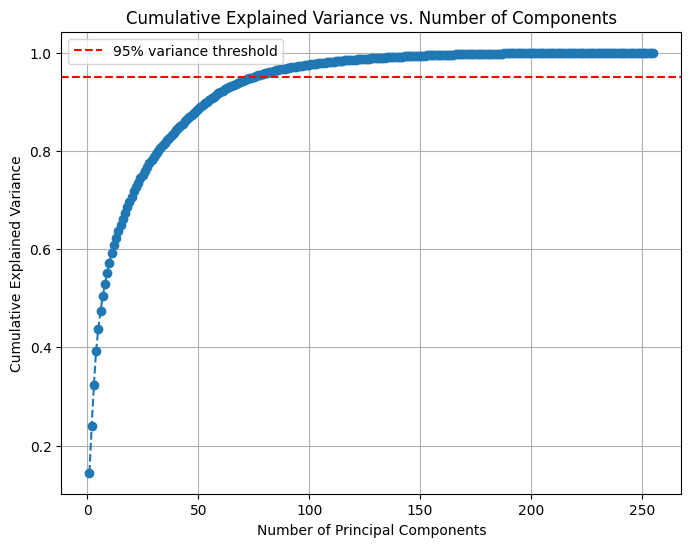

In [ ]:
from sklearn.decomposition import PCA

import sys
import os

sys.path.append(os.path.dirname("/Users/mac/Desktop/train_delay_prediction/utils.py"))

from utils import *

def perform_pca(percentage_of_data_usage, train_months=[3], test_months=[3]):
    data = load_data_more_features(percentage_of_data_usage, train_months, test_months)
    X = data["X"]
    
    # Standardizing the dataset (important for PCA)
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std
    
    pca = PCA()
    pca.fit(X_standardized)
    
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
    logging.info(f"Number of components needed for 95% explained variance: {num_components}")
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.legend()
    plt.grid()
    plt.show()
    
    return num_components, pca

num_components, pca_model = perform_pca(percentage_of_data_usage=1.0)

In [4]:
num_components

75